# Convolutional Neural Networks (CNNs)

Visualized example of a 2D convolution of a 5x5 input with a 3x3 kernel is shown below.

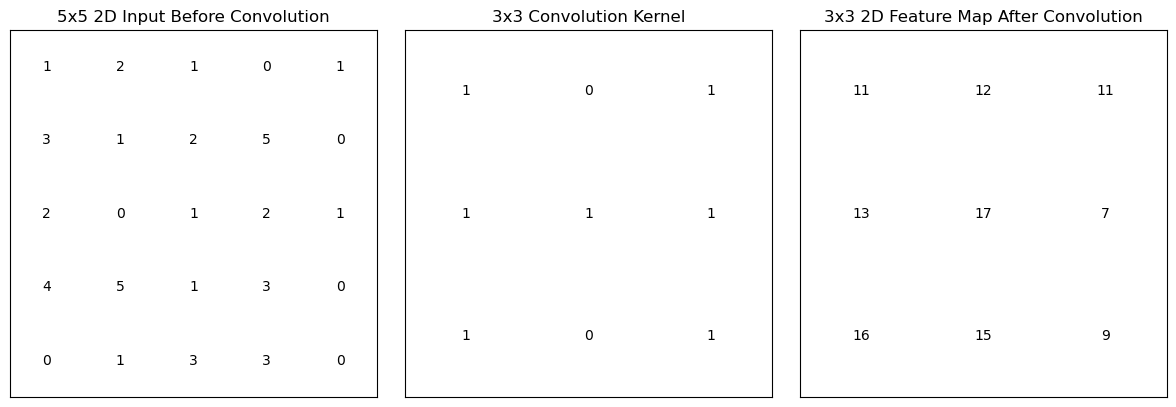

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 2D Input before convolution
input_grid = np.array([
  [1, 2, 1, 0, 1],
  [3, 1, 2, 5, 0],
  [2, 0, 1, 2, 1],
  [4, 5, 1, 3, 0],
  [0, 1, 3, 3, 0]
])

# 3x3 kernel
kernel = np.array([
  [1, 0, 1],
  [1, 1, 1],
  [1, 0, 1]
])

input_background = np.zeros((5,5))
output_background = np.zeros((3,3))

def visualize_convolution(input, kernel, stride=1):
  input_len = input.shape[0]
  kernel_len = kernel.shape[0]
  output_len = np.ceil((input.shape[0] - kernel_len + 1)/stride).astype(int)
  input_background = np.zeros_like(input)
  kernel_background = np.zeros_like(kernel)
  output_background = np.zeros((output_len, output_len))
  # Convolve 2D input with 3x3 kernel
  output_grid = np.zeros_like(output_background)
  for i in range(0, input_len - kernel_len + 1, stride):
    for j in range(0, input_len - kernel_len + 1, stride):
      output_grid[i // stride, j // stride] = np.sum(input[i:i + kernel_len, j:j + kernel_len] * kernel)

  # Plot the 2D input
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 3, 1)
  plt.imshow(input_background, cmap='Greys')
  plt.title(f'{input_len}x{input_len} 2D Input Before Convolution')
  plt.xticks([])
  plt.yticks([])
  for i in range(input_len):
    for j in range(input_len):
      plt.text(j, i, str(input_grid[i, j]), ha='center', va='center', color='black')

  # Plot the convolution kernel
  plt.subplot(1, 3, 2)
  plt.imshow(kernel_background, cmap='Greys')
  plt.title(f'{kernel_len}x{kernel_len} Convolution Kernel')
  plt.xticks([])
  plt.yticks([])
  for i in range(kernel_len):
    for j in range(kernel_len):
      plt.text(j, i, str(kernel[i, j]), ha='center', va='center', color='black')

  # Plot the final feature map
  plt.subplot(1, 3, 3)
  plt.imshow(output_background, cmap='Greys')
  plt.title(f'{output_len}x{output_len} 2D Feature Map After Convolution')
  plt.xticks([])
  plt.yticks([])
  for i in range(output_len):
    for j in range(output_len):
      plt.text(j, i, str(int(output_grid[i, j])), ha='center', va='center', color='black')

  plt.tight_layout()
  plt.show()

visualize_convolution(input_grid, kernel, stride=1)

The stride parameter controls the distance by which the filter moves after each convolution operation.

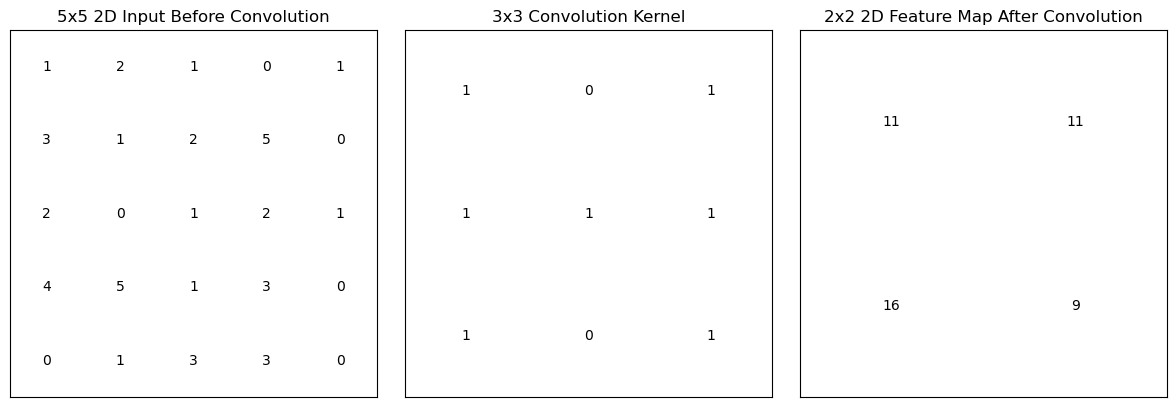

In [3]:
visualize_convolution(input_grid, kernel, stride=2)

Now, we can examine two different types of pooling techniques: Maxpool and Avgpool.

In [4]:
def visualize_pooling(input, pooling_size, operation='max_pool', stride=1):
  input_len = input.shape[0]
  output_len = (input_len - pooling_size) // stride + 1
  input_background = np.zeros_like(input)
  output_background = np.zeros((output_len, output_len))

  # Pooling on 2D input
  output_grid = np.zeros((output_len, output_len))
  if operation == 'max_pool':
    for i in range(0, input_len - pooling_size + 1, stride):
      for j in range(0, input_len - pooling_size + 1, stride):
        output_grid[i // stride, j // stride] = np.max(input[i:i + pooling_size, j:j + pooling_size])
  elif operation == 'avg_pool':
    for i in range(0, input_len - pooling_size + 1, stride):
      for j in range(0, input_len - pooling_size + 1, stride):
        output_grid[i // stride, j // stride] = np.mean(input[i:i + pooling_size, j:j + pooling_size])

  # Plot the 2D input
  plt.figure(figsize=(8, 4))
  plt.subplot(1, 2, 1)
  plt.imshow(input_background, cmap='Greys')
  plt.title(f'{input_len}x{input_len} 2D Input Before {operation}')
  plt.xticks([])
  plt.yticks([])
  for i in range(input_len):
    for j in range(input_len):
      plt.text(j, i, str(input[i, j]), ha='center', va='center', color='black')

  # Plot the pooling output
  plt.subplot(1, 2, 2)
  plt.imshow(output_background, cmap='Greys')
  plt.title(f'{output_len}x{output_len} 2D Feature Map After {operation}')
  plt.xticks([])
  plt.yticks([])
  for i in range(output_len):
    for j in range(output_len):
      if operation == 'max_pool':
        val = int(output_grid[i, j])
      else:
        val = round(output_grid[i, j], 2)
      plt.text(j, i, str(val), ha='center', va='center', color='black')

  plt.tight_layout()
  plt.show()

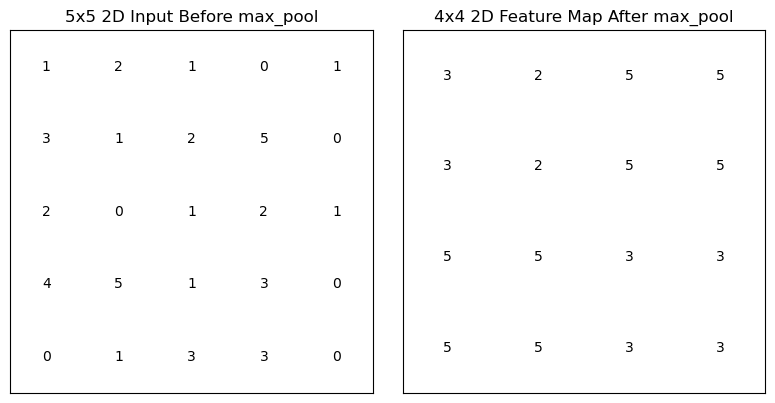

In [5]:
visualize_pooling(input_grid, 2, operation='max_pool', stride=1)

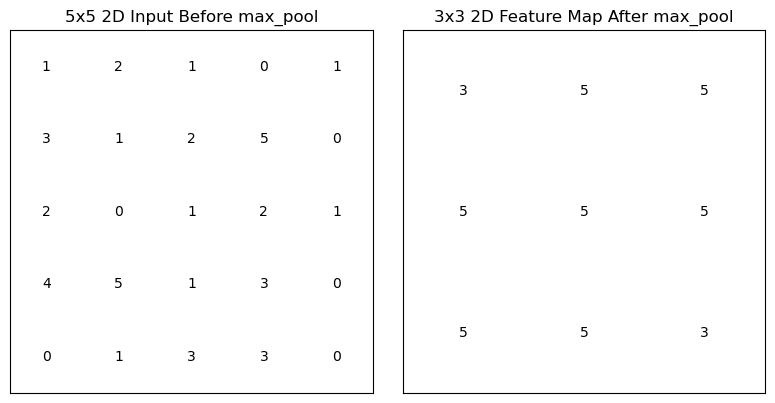

In [6]:
visualize_pooling(input_grid, 3, operation='max_pool', stride=1)

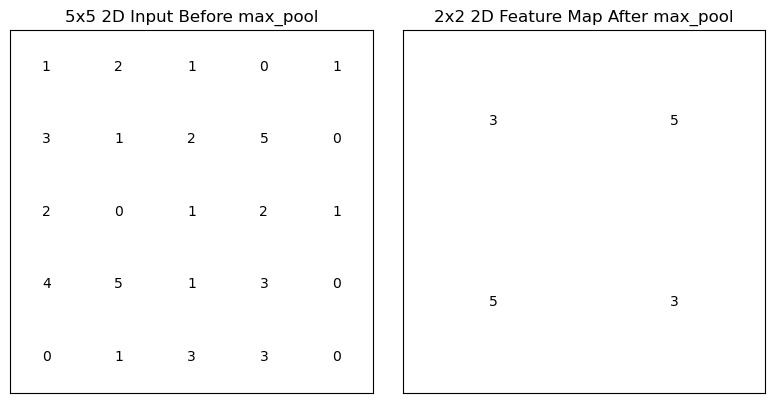

In [7]:
visualize_pooling(input_grid, 2, operation='max_pool', stride=2)

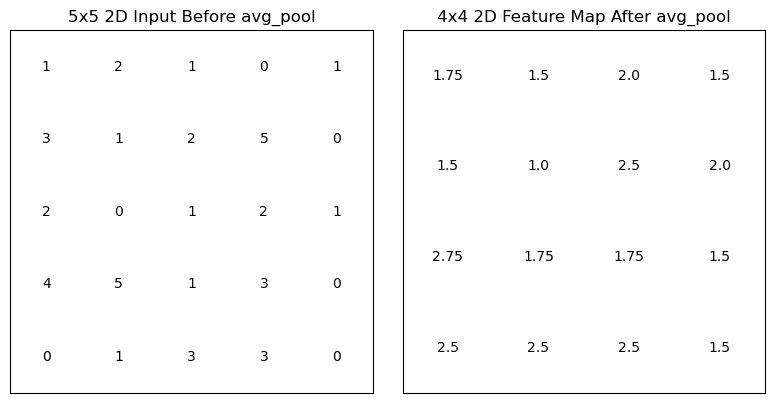

In [8]:
visualize_pooling(input_grid, 2, operation='avg_pool', stride=1)

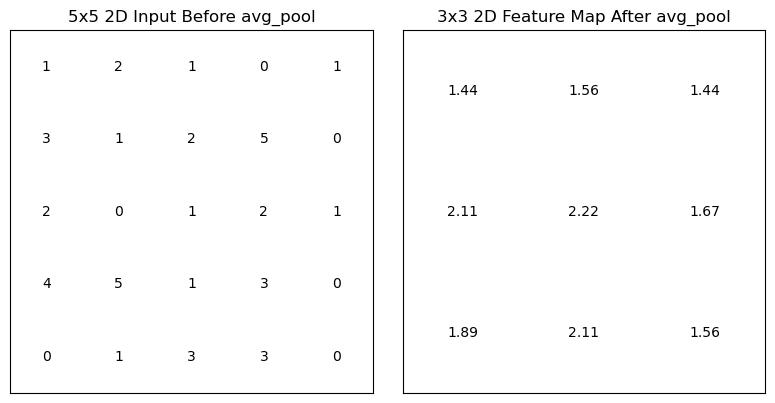

In [9]:
visualize_pooling(input_grid, 3, operation='avg_pool', stride=1)

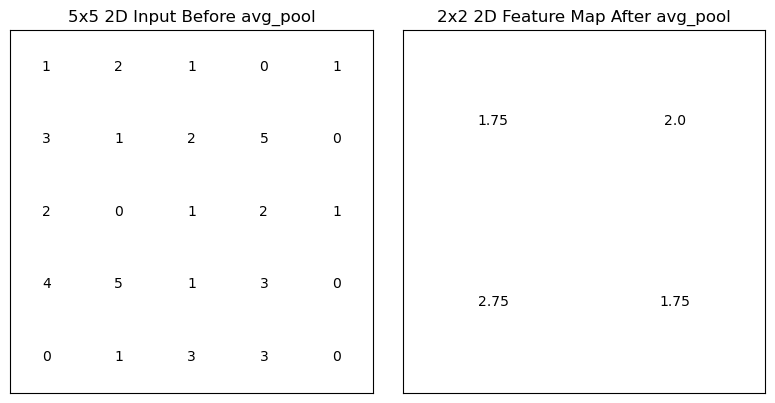

In [10]:
visualize_pooling(input_grid, 2, operation='avg_pool', stride=2)

## Creating our first CNN model in PyTorch

In PyTorch, we do not have to implement the convolution function ourselves. PyTorch provides the torch.nn module, which includes CNN.

In [2]:
#Import pytorch packages
import torch
import torch.nn as nn
import torch.nn.functional as F

Here, we define a simple CNN model which uses two convolutional layers followed by two fully connected layers. You can confirm the dimensions of the outputs as the 28x28 input propagates through the network.

In [11]:
class SIMPLE_CNN(nn.Module):
  def __init__(self):
    super(SIMPLE_CNN, self).__init__()
    # Define the first convolutional layer
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, stride=1)
    # Define the second convolutional layer
    self.conv2 = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=3, stride=1)
    # Define the first fully connected (linear) layer
    self.fc1 = nn.Linear(5 * 24 * 24, 30)  # 24x24 is the output size after convolution. 5 comes from the number of output channels we have after the second convolution
    # Define the second fully connected (linear) layer
    self.fc2 = nn.Linear(30, 10)

  def forward(self, x):
    print(f"Input Size: {x.size()}")
    # Apply the first convolutional layer followed by ReLU activation
    out = F.relu(self.conv1(x))
    print(f"Size After 1st CONV Layer: {out.size()}")
    # Apply the second convolutional layer followed by ReLU activation
    out = F.relu(self.conv2(out))
    print(f"Size After 2nd CONV Layer: {out.size()}")
    # Flatten the output tensor
    out = out.view(-1, 5 * 24 * 24)
    print(f"Size After Flattening: {out.size()}")
    # Apply the first fully connected layer followed by ReLU activation
    out = F.relu(self.fc1(out))
    print(f"Size After FC1: {out.size()}")
    # Apply the second fully connected layer followed by ReLU activation
    out = F.relu(self.fc2(out))
    print(f"Size After FC2: {out.size()}")
    return out

In [12]:
#Create an instance of the CNN class
simple_cnn = SIMPLE_CNN()
#Create a tensor (batch_size=1, channels=1, height=28, width=28)
input = torch.randn(1, 1, 28, 28)
#Feed the input to the CNN model
output = simple_cnn(input)

Input Size: torch.Size([1, 1, 28, 28])
Size After 1st CONV Layer: torch.Size([1, 3, 26, 26])
Size After 2nd CONV Layer: torch.Size([1, 5, 24, 24])
Size After Flattening: torch.Size([1, 2880])
Size After FC1: torch.Size([1, 30])
Size After FC2: torch.Size([1, 10])


Now, we can examine two different types of pooling techniques: Maxpool and Avgpool

In [13]:
input = torch.randn(1, 1, 28, 28)

# Max Pooling layer
# 2x2 Max Pooling with stride 1
maxpool = nn.MaxPool2d(kernel_size=2, stride=1)
maxpool_output = maxpool(input)
print(f"Max Pooled Output Size: {maxpool_output.size()}")

# Average Pooling layer
# 2x2 Average Pooling with stride 1
avgpool = nn.AvgPool2d(kernel_size=2, stride=1)
avgpool_output = avgpool(input)
print(f"Average Pooled Output Size: {avgpool_output.size()}")

Max Pooled Output Size: torch.Size([1, 1, 27, 27])
Average Pooled Output Size: torch.Size([1, 1, 27, 27])


The stride parameter controls the distance by which the filter moves after each convolution operation.

In [14]:
# Max Pooling layer
# 2x2 Max Pooling with stride 2
maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
maxpool_output = maxpool(input)
print(f"Max Pooled Output Size: {maxpool_output.size()}")

# Average Pooling layer
# 2x2 Average Pooling with stride 2
avgpool = nn.AvgPool2d(kernel_size=2, stride=2)
avgpool_output = avgpool(input)
print(f"Average Pooled Output Size: {avgpool_output.size()}")

Max Pooled Output Size: torch.Size([1, 1, 14, 14])
Average Pooled Output Size: torch.Size([1, 1, 14, 14])


Now, we can define a CNN model which uses two convolutional layers with kernel size of 5 with stride of 2, each followed by a 2x2 maxpool layer of stride 2. After the two convolutional layers,we have two fully connected layers. Here, we assume the input size is 64x64.

In [15]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    # Define the first convolutional layer
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=5, stride=2)
    # Define the first maxpool layer
    self.max_pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    # Define the second convolutional layer
    self.conv2 = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=5, stride=2)
    # Define the second maxpool layer
    self.max_pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    # Define the first fully connected (linear) layer
    self.fc1 = nn.Linear(5 * 3 * 3, 30)  # Now, 3x3 is the output size after convolution
    # Define the second fully connected (linear) layer
    self.fc2 = nn.Linear(30, 10)

  def forward(self, x):
    print(f"Input Size: {x.size()}")
    # Apply the first convolutional layer
    out = F.relu(self.conv1(x))
    print(f"Size After 1st CONV Layer: {out.size()}")
    # Apply the first convolutional layer
    out = self.max_pool1(out)
    print(f"Size After 1st MAXPOOL Layer: {out.size()}")
    # Apply the second convolutional layer
    out = F.relu(self.conv2(out))
    print(f"Size After 2nd CONV Layer: {out.size()}")
    # Apply the second maxpool layer
    out = self.max_pool2(out)
    print(f"Size After 2nd MAXPOOL Layer: {out.size()}")
    # Flatten the output tensor
    out = out.view(-1, 5 * 3 * 3)
    print(f"Size After Flattening: {out.size()}")
    # Apply the first fully connected layer followed by ReLU activation
    out = F.relu(self.fc1(out))
    print(f"Size After FC1: {out.size()}")
    # Apply the second fully connected layer followed by ReLU activation
    out = F.relu(self.fc2(out))
    print(f"Size After FC2: {out.size()}")
    return out

In [16]:
#Create an instance of the CNN class
cnn = CNN()
#Create a tensor (batch_size=1, channels=1, height=64, width=64)
input = torch.randn(1, 1, 64, 64)
#Feed the input to the CNN model
output = cnn(input)

Input Size: torch.Size([1, 1, 64, 64])
Size After 1st CONV Layer: torch.Size([1, 3, 30, 30])
Size After 1st MAXPOOL Layer: torch.Size([1, 3, 15, 15])
Size After 2nd CONV Layer: torch.Size([1, 5, 6, 6])
Size After 2nd MAXPOOL Layer: torch.Size([1, 5, 3, 3])
Size After Flattening: torch.Size([1, 45])
Size After FC1: torch.Size([1, 30])
Size After FC2: torch.Size([1, 10])


## MNIST Handwritten Digit Classification with CNN

Now we can apply CNN to the MNIST dataset. The goal of out model is to accurately classify handwritten digits from the MNIST dataset. MNIST data consists of 28x28 pixel grayscale images of handwritten digits from 0 to 9.

In [3]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init
import torch.optim as optim

Here are some example images from the MNIST dataset.

100%|██████████| 9912422/9912422 [00:00<00:00, 21913092.94it/s]


Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 28876208.30it/s]

Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw




100%|██████████| 1648877/1648877 [00:00<00:00, 12963026.67it/s]


Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]


Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



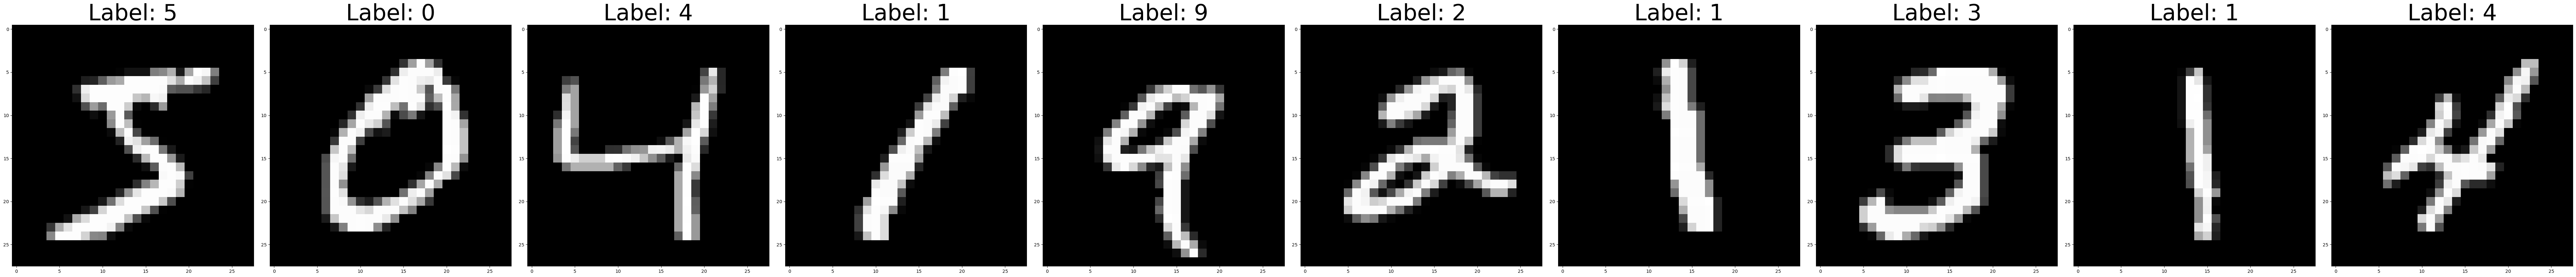

In [18]:
BATCH_SIZE = 100

mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

train_loader = torch.utils.data.DataLoader(
    dataset=mnist_train, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

test_loader = torch.utils.data.DataLoader(
    dataset=mnist_test, batch_size=BATCH_SIZE, shuffle=False, drop_last=True)

plt.figure(figsize=(80,8))
for i in range(10):
    image, label = mnist_train[i]
    plt.subplot(1, 10, i+1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'Label: {label}', fontsize=50)

plt.tight_layout()
plt.show()

Here we define a CNN model for the classification of MNIST digits.

In [26]:
class MNIST_CNN(nn.Module):
  def __init__(self):
    super(MNIST_CNN, self).__init__()
    # Define the first convolutional layer
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1)
    # Define the first maxpool layer
    self.max_pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    # Define the second convolutional layer
    self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1)
    # Define the second maxpool layer
    self.max_pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    # Define the first fully connected (linear) layer
    self.fc1 = nn.Linear(32 * 4 * 4, 64)
    # Define the second fully connected (linear) layer
    self.fc2 = nn.Linear(64, 10)

  def forward(self, x):
    # Apply the first convolutional layer
    out = F.relu(self.conv1(x))
    # Apply the first convolutional layer
    out = self.max_pool1(out)
    # Apply the second convolutional layer
    out = F.relu(self.conv2(out))
    # Apply the second maxpool layer
    out = self.max_pool2(out)
    # Flatten the output tensor
    out = out.view(-1, 32 * 4 * 4)
    # Apply the first fully connected layer followed by ReLU activation
    out = F.relu(self.fc1(out))
    # Apply the second fully connected layer followed by ReLU activation
    out = F.relu(self.fc2(out))
    return out

In [27]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device =='cuda':
    print("Run on GPU...")
else:
    print("Run on CPU...")

model = MNIST_CNN().to(device)
data = torch.randn(1,1,28,28)
data = data.to(device)
out = model(data)
print(out.detach().cpu().numpy().shape)

Run on GPU...
(1, 10)


In [28]:
LR = 0.01
MOMENTUM = 0.9
REG = 1e-4
EPOCHS = 10

In [29]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=LR, momentum=MOMENTUM, weight_decay=REG)

print("==> Training starts!")
print("="*50)
for i in range(0, EPOCHS):
  model.train()
  print("Epoch %d:" %i)
  total_examples = 0
  correct_examples = 0
  for batch_idx, (inputs, targets) in enumerate(train_loader):
    inputs = inputs.to(device)
    targets = targets.to(device)
    out = model(inputs)
    loss = criterion(out, targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    _, predicted = torch.max(out, 1)
    total_examples += targets.size(0)
    correct_examples += (predicted == targets).sum().item()
    avg_acc = correct_examples / total_examples
  print("Training accuracy: %.4f" %(avg_acc))

==> Training starts!
Epoch 0:
Training accuracy: 0.7273
Epoch 1:
Training accuracy: 0.8762
Epoch 2:
Training accuracy: 0.8837
Epoch 3:
Training accuracy: 0.9776
Epoch 4:
Training accuracy: 0.9868
Epoch 5:
Training accuracy: 0.9875
Epoch 6:
Training accuracy: 0.9896
Epoch 7:
Training accuracy: 0.9909
Epoch 8:
Training accuracy: 0.9923
Epoch 9:
Training accuracy: 0.9926


We see that we can easily achieve 97% training accuracy even after the first epoch. After all 10 epochs, we reach 99% accuracy on the training set. Now, we test our model on unseen testing set to evaluate our model performance.

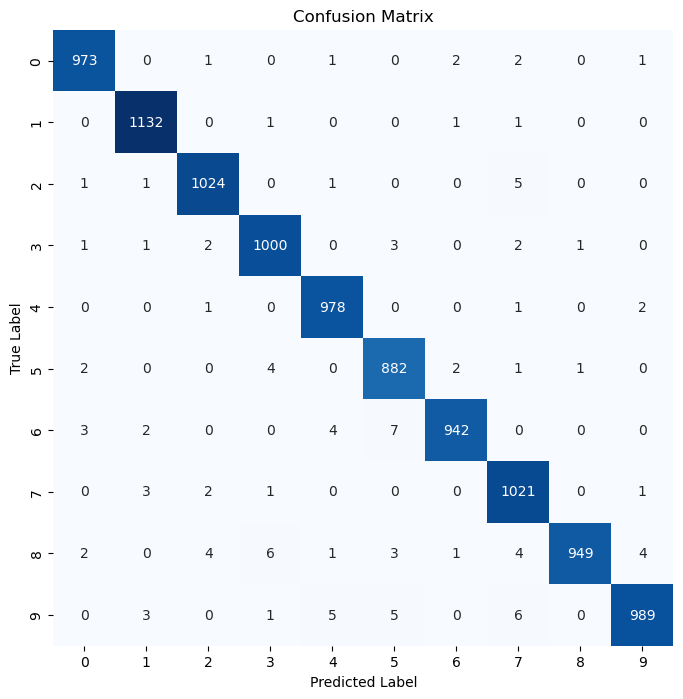

In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

true_labels = []
predicted_labels = []
total_examples = 0
correct_examples = 0

model.eval()
with torch.no_grad():
    for batch_idx, (inputs, targets) in enumerate(test_loader):
      inputs = inputs.to(device)
      targets = targets.to(device)
      out = model(inputs)
      _, predicted = torch.max(out, 1)
      total_examples += targets.size(0)
      correct_examples += (predicted == targets).sum().item()
      true_labels.append(targets.cpu().numpy())
      predicted_labels.append(predicted.cpu().numpy())
    avg_acc = correct_examples / total_examples

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)
conf_matrix = confusion_matrix(true_labels.flatten(), predicted_labels.flatten())

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

We see that our CNN model successfully classifies 98.9% of the MNIST images.

## CIFAR100 Image Classification wtih Simple CNN

Now, we aim to apply our CNN knowledge on a much bigger dataset, namely the CIFAR100 dataset which contains 60,000 RGB (3 channel) images of size 32x32. There are 100 classes, thus the name CIFAR100. We can use the same workflow as above by first showing some examples from the CIFAR100 dataset.

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

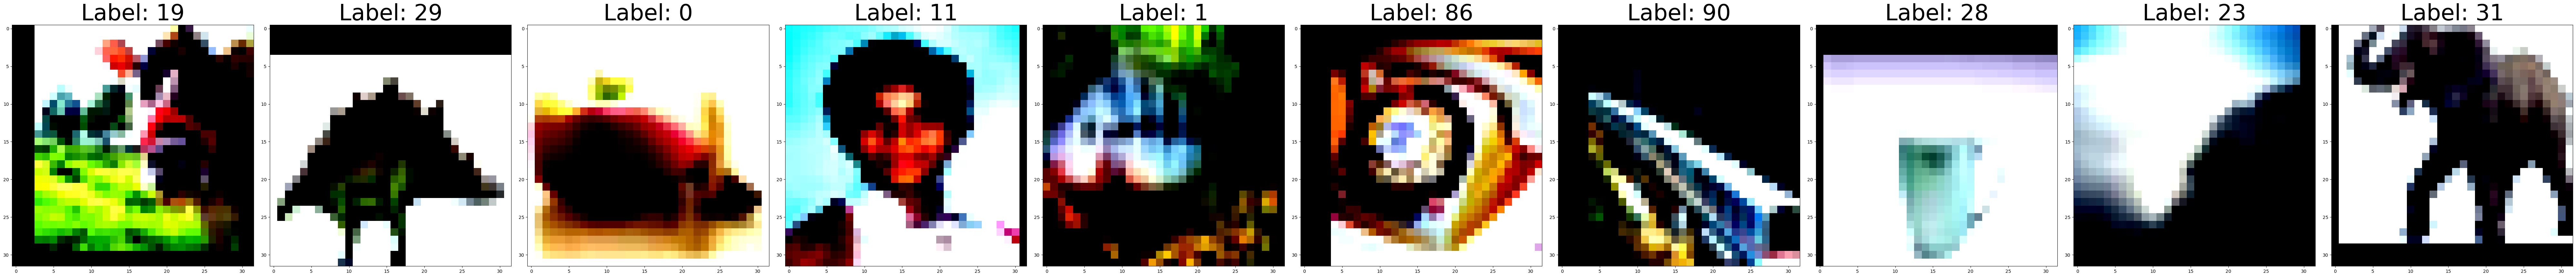

In [4]:
CIFAR100_train = dsets.CIFAR100(root='CIFAR100_data/',
                          train=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.RandomHorizontalFlip(p=0.5),
                              transforms.RandomCrop(size=(32, 32), padding=4),
                              transforms.Normalize(mean=[0.5071, 0.4867, 0.4408], std=[0.2675, 0.2565, 0.2761]),
                          ]),
                          download=True)

CIFAR100_test = dsets.CIFAR100(root='CIFAR100_data/',
                         train=False,
                         transform=transforms.Compose([
                             transforms.ToTensor(),
                             transforms.Normalize(mean=[0.5071, 0.4867, 0.4408], std=[0.2675, 0.2565, 0.2761]),
                         ]),
                         download=True)

plt.figure(figsize=(80,8))
for i in range(10):
    image, label = CIFAR100_train[i]
    plt.subplot(1, 10, i+1)
    plt.imshow(image.permute(1,2,0))
    plt.title(f'Label: {label}', fontsize=50)

plt.tight_layout()
plt.show()

Here, we define our model to classify CIFAR100 with a simple CNN model. We have three convolution layers followed by two fully connected with layer.

In [8]:
class CIFAR100_CNN(nn.Module):
  def __init__(self):
    super(CIFAR100_CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
    self.bn1 = nn.BatchNorm2d(32)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
    self.bn2 = nn.BatchNorm2d(64)
    self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
    self.bn3 = nn.BatchNorm2d(128)
    self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(128 * 4 * 4, 512)
    self.dropout = nn.Dropout(0.5)
    self.fc2 = nn.Linear(512, 100)

  def forward(self, x):
    out = F.relu(self.bn1(self.conv1(x)))
    out = self.max_pool(out)
    out = F.relu(self.bn2(self.conv2(out)))
    out = self.max_pool(out)
    out = F.relu(self.bn3(self.conv3(out)))
    out = self.max_pool(out)
    out = out.view(-1, 128 * 4 * 4)
    out = F.relu(self.fc1(out))
    out = self.dropout(out)
    out = self.fc2(out)
    return out

In [9]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device =='cuda':
    print("Run on GPU...")
else:
    print("Run on CPU...")

model = CIFAR100_CNN().to(device)
data = torch.randn(1,3,32,32)
data = data.to(device)
out = model(data)
print(out.detach().cpu().numpy().shape)

Run on GPU...
(1, 100)


In [5]:
LR = 0.001
REG = 1e-4
EPOCHS = 20
BATCH_SIZE = 100

train_loader = torch.utils.data.DataLoader(
    dataset=CIFAR100_train, batch_size=BATCH_SIZE, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    dataset=CIFAR100_test, batch_size=BATCH_SIZE, shuffle=False)

In [36]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=REG)

print("==> Training starts!")
print("="*50)
for i in range(0, EPOCHS):
  model.train()
  print("Epoch %d:" %i)
  total_examples = 0
  correct_examples = 0
  for batch_idx, (inputs, targets) in enumerate(train_loader):
    inputs = inputs.to(device)
    targets = targets.to(device)
    out = model(inputs)
    loss = criterion(out, targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    _, predicted = torch.max(out, 1)
    total_examples += targets.size(0)
    correct_examples += (predicted == targets).sum().item()
    avg_acc = correct_examples / total_examples
  print("Training accuracy: %.4f" %(avg_acc))

==> Training starts!
Epoch 0:
Training accuracy: 0.0919
Epoch 1:
Training accuracy: 0.1566
Epoch 2:
Training accuracy: 0.1986
Epoch 3:
Training accuracy: 0.2295
Epoch 4:
Training accuracy: 0.2540
Epoch 5:
Training accuracy: 0.2719
Epoch 6:
Training accuracy: 0.2874
Epoch 7:
Training accuracy: 0.3045
Epoch 8:
Training accuracy: 0.3163
Epoch 9:
Training accuracy: 0.3280
Epoch 10:
Training accuracy: 0.3395
Epoch 11:
Training accuracy: 0.3461
Epoch 12:
Training accuracy: 0.3565
Epoch 13:
Training accuracy: 0.3656
Epoch 14:
Training accuracy: 0.3729
Epoch 15:
Training accuracy: 0.3809
Epoch 16:
Training accuracy: 0.3891
Epoch 17:
Training accuracy: 0.3987
Epoch 18:
Training accuracy: 0.4058
Epoch 19:
Training accuracy: 0.4101


We can continue training our simple CNN model for more epochs to reach a higher accuracy, but continuing the training will show that we cannot achieve a significantly higher accuracy on the CIFAR100 dataset. This means that we need a deeper and complex model. At the bottom, we have a Residual Network (ResNet) which solves the vanishing gradient problem of deep neural networks with skip connections. ResNet was proposed by Kaiming He et al, and the original paper can be found here: "Deep Residual Learning for Image Recognition" https://arxiv.org/abs/1512.03385

In [6]:
class ResidualBlock(nn.Module):
  def __init__(self, in_channels, out_channels, stride):
    super(ResidualBlock, self).__init__()
    self.conv1 = nn.Conv2d(in_channels, out_channels, 3, stride=stride, padding=1)
    self.bn1 = nn.BatchNorm2d(out_channels)
    self.conv2 = nn.Conv2d(out_channels, out_channels, 3, stride=1, padding=1)
    self.bn2 = nn.BatchNorm2d(out_channels)
    self.downsample = None
    if stride==2:
      self.downsample = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride)

  def forward(self, x):
    res = x
    # print(f"RES Shape: {res.shape}")
    out = self.conv1(x)
    # print(f"CONV1 Shape: {out.shape}")
    out = self.bn1(out)
    out = F.relu(out)
    out = self.conv2(out)
    # print(f"CONV2 Shape: {out.shape}")
    out = self.bn2(out)
    if self.downsample is not None:
      res = self.downsample(x)
      # print(f"NEW RES Shape: {res.shape}")

    out += res
    out = F.relu(out)
    return out

class ResNet(nn.Module):
  def __init__(self, resblock, n=3):
    super(ResNet, self).__init__()
    self.n = n
    self.conv1 = nn.Conv2d(3, 16, 3, stride=1, padding=1)
    self.bn1 = nn.BatchNorm2d(16)
    self.avgpool = nn.AvgPool2d(4)
    self.fc1   = nn.Linear(128, 100)
    self.layer1 = self.create_layer(resblock, 16, 16, stride=1)
    self.layer2 = self.create_layer(resblock, 16, 32, stride=2)
    self.layer3 = self.create_layer(resblock, 32, 64, stride=2)
    self.layer4 = self.create_layer(resblock, 64, 128, stride=2)

  def create_layer(self, resblock, in_channels, out_channels, stride):
    layers = nn.ModuleList()
    layers.append(resblock(in_channels, out_channels, stride))
    for i in range(self.n-1):
      layers.append(resblock(out_channels, out_channels, stride=1))
    return nn.Sequential(*layers)

  def forward(self, x):
    out = self.conv1(x)
    out = self.bn1(out)
    out = F.relu(out)
    out = self.layer1(out)
    out = self.layer2(out)
    out = self.layer3(out)
    out = self.layer4(out)
    out = self.avgpool(out)
    out = out.view(out.size(0), -1)
    out = self.fc1(out)
    return out

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device =='cuda':
    print("Run on GPU...")
else:
    print("Run on CPU...")

model = ResNet(ResidualBlock).to(device)
data = torch.randn(1,3,32,32)
data = data.to(device)
out = model(data)
print(out.detach().cpu().numpy().shape)

Run on GPU...
(1, 100)


## CIFAR100 Classification with Residual Neural Networks (ResNet)

We will use a technique called learning rate decay, which is a method to reduce our learning rate of our optimizer during training. If we use a high learning rate, there is a chance that we overshoot and miss the optimal solution. If we use a small learning rate, the learning process may take too long or be stuck at a local minimum. Learning rate decay starts off with a high learning rate to make big progress towards the optimal solution. Later, we decay the learning rate to avoid overshooting. Here, we start with LR=0.001 and after 30/50 epochs we will reduce LR to 0.0001.

==> Training starts!
Epoch 0:
Saving ...
Training accuracy: 0.0933
Epoch 1:
Saving ...
Training accuracy: 0.1903
Epoch 2:
Saving ...
Training accuracy: 0.2619
Epoch 3:
Saving ...
Training accuracy: 0.3268
Epoch 4:
Saving ...
Training accuracy: 0.3780
Epoch 5:
Saving ...
Training accuracy: 0.4178
Epoch 6:
Saving ...
Training accuracy: 0.4510
Epoch 7:
Saving ...
Training accuracy: 0.4760
Epoch 8:
Saving ...
Training accuracy: 0.5027
Epoch 9:
Saving ...
Training accuracy: 0.5226
Epoch 10:
Saving ...
Training accuracy: 0.5405
Epoch 11:
Saving ...
Training accuracy: 0.5550
Epoch 12:
Saving ...
Training accuracy: 0.5728
Epoch 13:
Saving ...
Training accuracy: 0.5856
Epoch 14:
Saving ...
Training accuracy: 0.5984
Epoch 15:
Saving ...
Training accuracy: 0.6098
Epoch 16:
Saving ...
Training accuracy: 0.6137
Epoch 17:
Saving ...
Training accuracy: 0.6284
Epoch 18:
Saving ...
Training accuracy: 0.6336
Epoch 19:
Saving ...
Training accuracy: 0.6444
Epoch 20:
Saving ...
Training accuracy: 0.6520
Ep

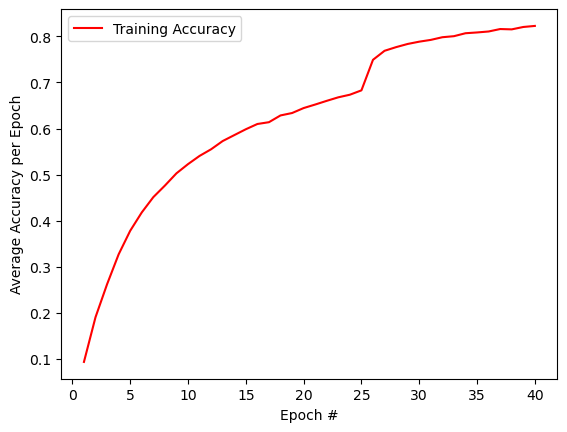

In [14]:
import os, sys
def train_model(model, LR, DECAY, REG, EPOCHS, DECAY_EPOCHS, BATCH_SIZE, train_loader, model_name):
    model = ResNet(ResidualBlock).to(device)
    CHECKPOINT_FOLDER = "./saved_model"
    
    criterion = torch.nn.CrossEntropyLoss().to(device)
    optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=REG)
    
    train_acc = []
    best_acc = 0
    
    print("==> Training starts!")
    print("="*50)
    for i in range(0, EPOCHS):
      model.train()
      print("Epoch %d:" %i)
      total_examples = 0
      correct_examples = 0
      if i % DECAY_EPOCHS == 0 and i != 0:
        LR = LR * DECAY
        for param_group in optimizer.param_groups:
            param_group['lr'] = LR
      for batch_idx, (inputs, targets) in enumerate(train_loader):
        inputs = inputs.to(device)
        targets = targets.to(device)
        out = model(inputs)
        loss = criterion(out, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(out, 1)
        total_examples += targets.size(0)
        correct_examples += (predicted == targets).sum().item()
        avg_acc = correct_examples / total_examples
    
      # save the model checkpoint
      if avg_acc > best_acc:
          best_acc = avg_acc
          if not os.path.exists(CHECKPOINT_FOLDER):
              os.makedirs(CHECKPOINT_FOLDER)
          print("Saving ...")
          state = {'state_dict': model.state_dict(), 'epoch': i, 'lr': LR}
          torch.save(state, os.path.join(CHECKPOINT_FOLDER, f'{model_name}.pth'))
    
      print("Training accuracy: %.4f" %(avg_acc))
      train_acc.append(avg_acc)
    plt.figure()
    plt.plot(np.arange(1,EPOCHS+1), np.array(train_acc), color='red')
    plt.legend(['Training Accuracy'])
    plt.xlabel('Epoch #')
    plt.ylabel('Average Accuracy per Epoch')
    plt.show()
    return model

LR = 0.001
DECAY = 0.1
REG = 1e-4
EPOCHS = 40
DECAY_EPOCHS = 25
BATCH_SIZE = 100
model = train_model(model, LR, DECAY, REG, EPOCHS, DECAY_EPOCHS, BATCH_SIZE, train_loader, "resnet_baseline")

As shown below, we see that ResNet is much more effective in classifying the CIFAR100 dataset compared to the simple CNN model that we have. We also see that we see a slight 'jump' in accuracy when we decay the weight to 0.0001.

In [29]:
model = ResNet(ResidualBlock)
state_dict = torch.load('./saved_model/resnet.pth')
model.load_state_dict(state_dict['state_dict'])
model.cuda()

ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (avgpool): AvgPool2d(kernel_size=4, stride=4, padding=0)
  (fc1): Linear(in_features=128, out_features=100, bias=True)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(

Now, we examine the Top-5 accuracy (model's top 5 highest probability classification match with the true label) of our ResNet model.

In [30]:
def test_accuracy(model, test_loader, device):
    true_labels = []
    predicted_labels = []
    total_examples = 0
    correct_examples = 0
    
    model.eval()
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(test_loader):
            inputs = inputs.to(device)
            targets = targets.to(device)
            out = model(inputs)
            _, predicted = torch.topk(out, 5, dim=1)
            targets_np = targets.cpu().numpy()
            predicted_np = predicted.cpu().numpy()
            total_examples += targets.size(0)
            for i in range(targets_np.shape[0]):
                if targets_np[i] in predicted_np[i]:
                    correct_examples += 1
    
    top_5_acc = correct_examples / total_examples
    print("Top-5 Accuracy:", top_5_acc)

test_accuracy(model, test_loader, device)

Top-5 Accuracy: 0.897


We have seen that ResNet was able to classify the CIFAR100 dataset with very high accuracy, despite the fact that we have 100 classes. For further exploration, we may try different hyperparameters to train our ResNet model and it's affect on the final accuracy.

Here, we use a bigger regularization for the Adam optimizer.

==> Training starts!
Epoch 0:
Saving ...
Training accuracy: 0.0694
Epoch 1:
Saving ...
Training accuracy: 0.1099
Epoch 2:
Saving ...
Training accuracy: 0.1312
Epoch 3:
Saving ...
Training accuracy: 0.1587
Epoch 4:
Saving ...
Training accuracy: 0.1795
Epoch 5:
Saving ...
Training accuracy: 0.2027
Epoch 6:
Saving ...
Training accuracy: 0.2211
Epoch 7:
Saving ...
Training accuracy: 0.2324
Epoch 8:
Saving ...
Training accuracy: 0.2453
Epoch 9:
Saving ...
Training accuracy: 0.2552
Epoch 10:
Saving ...
Training accuracy: 0.2694
Epoch 11:
Saving ...
Training accuracy: 0.2753
Epoch 12:
Saving ...
Training accuracy: 0.2816
Epoch 13:
Saving ...
Training accuracy: 0.2891
Epoch 14:
Saving ...
Training accuracy: 0.2955
Epoch 15:
Saving ...
Training accuracy: 0.2998
Epoch 16:
Saving ...
Training accuracy: 0.3031
Epoch 17:
Saving ...
Training accuracy: 0.3076
Epoch 18:
Saving ...
Training accuracy: 0.3127
Epoch 19:
Saving ...
Training accuracy: 0.3166
Epoch 20:
Saving ...
Training accuracy: 0.3201
Ep

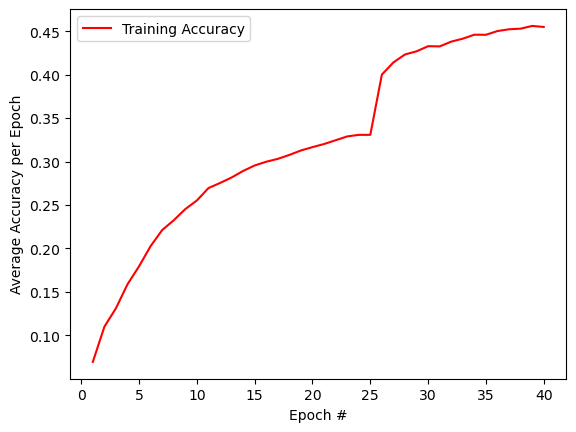

Top-5 Accuracy: 0.7859


In [40]:
LR = 0.001
DECAY = 0.1
REG = 1e-2
EPOCHS = 40
DECAY_EPOCHS = 25
BATCH_SIZE = 100
reg_model = train_model(model, LR, DECAY, REG, EPOCHS, DECAY_EPOCHS, BATCH_SIZE, train_loader, "resnet_reg")
test_accuracy(reg_model, test_loader, device)

We see that the training accuracy has decreased by 45% compared to the baseline ResNet model. The Top-5 accuracy has also decreased by 12%.

Here, we use a bigger learning rate.

==> Training starts!
Epoch 0:
Saving ...
Training accuracy: 0.0458
Epoch 1:
Saving ...
Training accuracy: 0.1176
Epoch 2:
Saving ...
Training accuracy: 0.1602
Epoch 3:
Saving ...
Training accuracy: 0.1865
Epoch 4:
Saving ...
Training accuracy: 0.2042
Epoch 5:
Saving ...
Training accuracy: 0.2170
Epoch 6:
Saving ...
Training accuracy: 0.2277
Epoch 7:
Saving ...
Training accuracy: 0.2393
Epoch 8:
Saving ...
Training accuracy: 0.2465
Epoch 9:
Saving ...
Training accuracy: 0.2536
Epoch 10:
Saving ...
Training accuracy: 0.2619
Epoch 11:
Saving ...
Training accuracy: 0.2692
Epoch 12:
Saving ...
Training accuracy: 0.2785
Epoch 13:
Saving ...
Training accuracy: 0.2807
Epoch 14:
Saving ...
Training accuracy: 0.2865
Epoch 15:
Saving ...
Training accuracy: 0.2922
Epoch 16:
Saving ...
Training accuracy: 0.2995
Epoch 17:
Saving ...
Training accuracy: 0.3019
Epoch 18:
Saving ...
Training accuracy: 0.3056
Epoch 19:
Saving ...
Training accuracy: 0.3096
Epoch 20:
Saving ...
Training accuracy: 0.3139
Ep

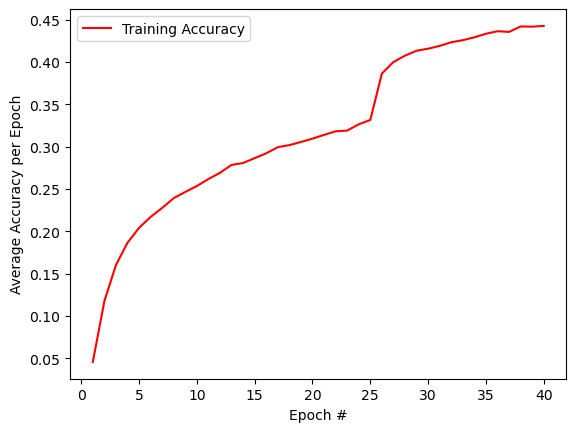

Top-5 Accuracy: 0.7459


In [41]:
LR = 0.01
DECAY = 0.1
REG = 1e-4
EPOCHS = 40
DECAY_EPOCHS = 25
BATCH_SIZE = 100
lr_model = train_model(model, LR, DECAY, REG, EPOCHS, DECAY_EPOCHS, BATCH_SIZE, train_loader, "resnet_lr")
test_accuracy(lr_model, test_loader, device)

We see that the training accuracy has decreased by 47% compared to the baseline ResNet model. The Top-5 accuracy has also decreased by 17%.

What if the very first convolution layer, which takes the training image directly as the input to the layer, has a wider kernel size (from 3x3 to 5x5)?

In [10]:
class ResNet_wide(nn.Module):
  def __init__(self, resblock, n=3):
    super(ResNet_wide, self).__init__()
    self.n = n
    self.conv1 = nn.Conv2d(3, 16, 5, stride=1, padding=1)
    self.bn1 = nn.BatchNorm2d(16)
    self.avgpool = nn.AvgPool2d(4)
    self.fc1   = nn.Linear(128, 100)
    self.layer1 = self.create_layer(resblock, 16, 16, stride=1)
    self.layer2 = self.create_layer(resblock, 16, 32, stride=2)
    self.layer3 = self.create_layer(resblock, 32, 64, stride=2)
    self.layer4 = self.create_layer(resblock, 64, 128, stride=2)

  def create_layer(self, resblock, in_channels, out_channels, stride):
    layers = nn.ModuleList()
    layers.append(resblock(in_channels, out_channels, stride))
    for i in range(self.n-1):
      layers.append(resblock(out_channels, out_channels, stride=1))
    return nn.Sequential(*layers)

  def forward(self, x):
    out = self.conv1(x)
    out = self.bn1(out)
    out = F.relu(out)
    out = self.layer1(out)
    out = self.layer2(out)
    out = self.layer3(out)
    out = self.layer4(out)
    out = self.avgpool(out)
    out = out.view(out.size(0), -1)
    out = self.fc1(out)
    return out

==> Training starts!
Epoch 0:
Saving ...
Training accuracy: 0.0262
Epoch 1:
Saving ...
Training accuracy: 0.0393
Epoch 2:
Saving ...
Training accuracy: 0.0490
Epoch 3:
Saving ...
Training accuracy: 0.0509
Epoch 4:
Saving ...
Training accuracy: 0.0520
Epoch 5:
Saving ...
Training accuracy: 0.0547
Epoch 6:
Training accuracy: 0.0519
Epoch 7:
Training accuracy: 0.0543
Epoch 8:
Training accuracy: 0.0540
Epoch 9:
Saving ...
Training accuracy: 0.0563


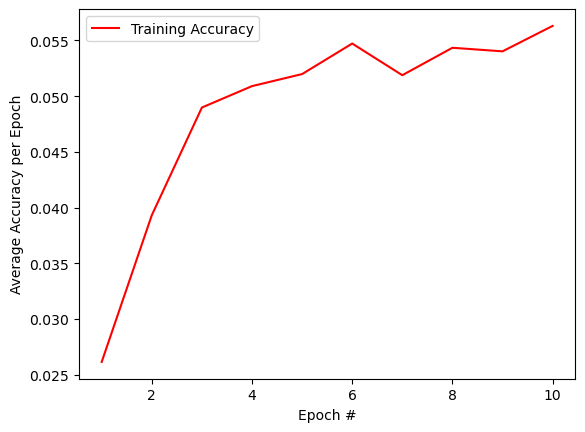

In [18]:
LR = 0.01
DECAY = 0.1
REG = 1e-2
EPOCHS = 10
BATCH_SIZE = 100
model = ResNet_wide(ResidualBlock)
lr_model = train_model(model, LR, DECAY, REG, EPOCHS, DECAY_EPOCHS, BATCH_SIZE, train_loader, "resnet_wide")

Clearly, a wider kernel does not allow the model to learn any information. It is important to understand the receptive field that the CNN layer is examining. A kernel of size 3x3 has a receptive field of 9 pixels, whereas a 5x5 kernel size has a receptive field of 25 pixels. It is usually better for the CNN layers to learn larger features in the image incrementally by starting with a small kernel size to learn the local features in the image and adding on more CNN layers to learn the broader/larger features in the image. Therefore, in this case, we can say that using 5x5 kernel size as the very first CNN layer fails to capture enough local features to distinguish the 100 classes in the CIFAR100 dataset.